# Generación y evaluación de la calidad de labels

## 1. Cargar y limpiar datos de sensores

In [ ]:
import sys
import os

# Agrega la raíz del proyecto al path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [ ]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Librerías personalizadas
from scripts.load_sensors import cargar_y_limpiar_sensores, clean_and_analyze_sensores
from scripts.match_images_sensors import generar_labels_csv, generar_labels_csv_normalizado


### Cargar y limpiar sensores (datos de variables fisico químicas)

In [ ]:
# Definir rutas
excel_path = "../data/sensores.xlsx"
output_csv_path = "../data/sensores_limpio.csv"
hoja = "nov17"

# Ejecutar función
df_sensores = cargar_y_limpiar_sensores(excel_path, output_csv_path, hoja=hoja)
df_sensores.head()

,timestamp,temperatura,pH,conductividad,TDS,Sal.[psu],Press.[psi],DO_mgL
0,2021-11-17 11:44:29,16.33,5.7,647,0.324,0.32,10.887,4.70
1,2021-11-17 11:44:34,16.33,5.7,647,0.323,0.32,10.885,4.69
2,2021-11-17 11:44:39,16.34,5.7,647,0.323,0.32,10.885,4.67
3,2021-11-17 11:44:44,16.34,5.7,647,0.323,0.32,10.886,4.64
4,2021-11-17 11:44:49,16.34,5.7,647,0.324,0.32,10.887,4.62


### Limpiar y analizar sensores (datos fisico químicos)

=== 1) Datos crudos cargados ===
Columnas: ['timestamp', 'Temp', 'pH', 'mV[pH]', 'ORP[mV]', 'EC', 'EC Abs', 'RES[KOhm-cm]', 'TDS [ppt]', 'Sal.[psu]', 'Sigma T[sT]', 'Press.[psi]', 'D.O.[%]', 'D.O.[mg/L]']
Forma: (19972, 14)


,timestamp,Temp,pH,mV[pH],ORP[mV],EC,EC Abs,RES[KOhm-cm],TDS [ppt],Sal.[psu],Sigma T[sT],Press.[psi],D.O.[%],D.O.[mg/L]
0,2021-11-17 11:44:29,16.33,5.7,90.5,238.3,647,540,1.5,0.324,0.32,0,10.887,65.2,4.70
1,2021-11-17 11:44:34,16.33,5.7,90.5,238.3,647,540,1.5,0.323,0.32,0,10.885,65.1,4.69
2,2021-11-17 11:44:39,16.34,5.7,90.5,238.3,647,540,1.5,0.323,0.32,0,10.885,64.9,4.67
3,2021-11-17 11:44:44,16.34,5.7,90.5,238.3,647,540,1.5,0.323,0.32,0,10.886,64.5,4.64
4,2021-11-17 11:44:49,16.34,5.7,90.5,238.2,647,541,1.5,0.324,0.32,0,10.887,64.1,4.62


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19972 entries, 0 to 19971
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     19972 non-null  datetime64[ns]
 1   Temp          19972 non-null  float64       
 2   pH            19972 non-null  float64       
 3   mV[pH]        19972 non-null  float64       
 4   ORP[mV]       19972 non-null  float64       
 5   EC            19972 non-null  int64         
 6   EC Abs        19972 non-null  int64         
 7   RES[KOhm-cm]  19972 non-null  float64       
 8   TDS [ppt]     19972 non-null  float64       
 9   Sal.[psu]     19972 non-null  float64       
 10  Sigma T[sT]   19972 non-null  int64         
 11  Press.[psi]   19972 non-null  float64       
 12  D.O.[%]       19972 non-null  float64       
 13  D.O.[mg/L]    19972 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(3)
memory usage: 2.1 MB


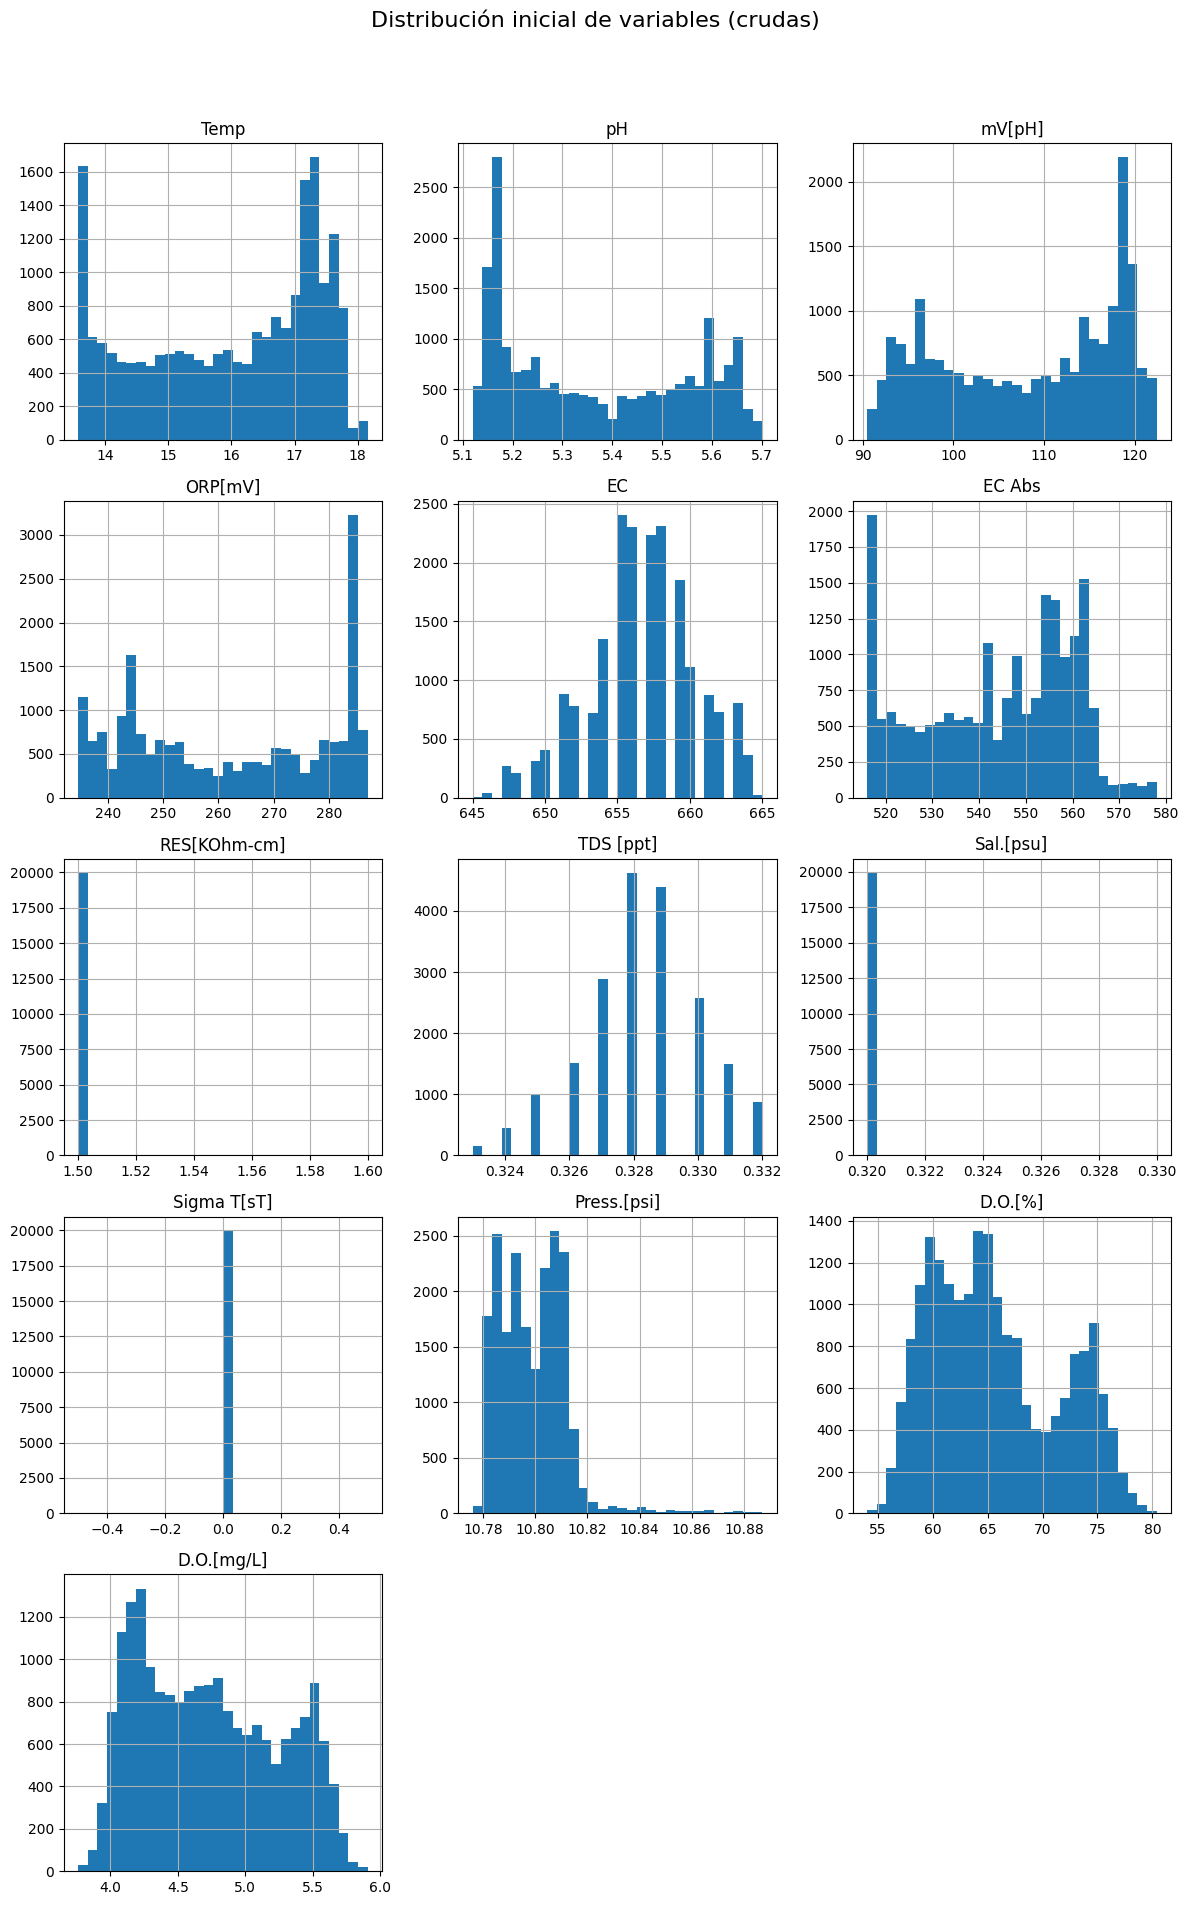


=== 2) Conversión de timestamp (invalidos: 0) ===

=== 3) Columnas tras renombrar y eliminar innecesarias ===
['timestamp', 'temperatura', 'pH', 'conductividad', 'TDS', 'Sal.[psu]', 'Press.[psi]', 'DO_mgL']

=== 4) Filtrado de rangos físicos (filtradas: 0) ===


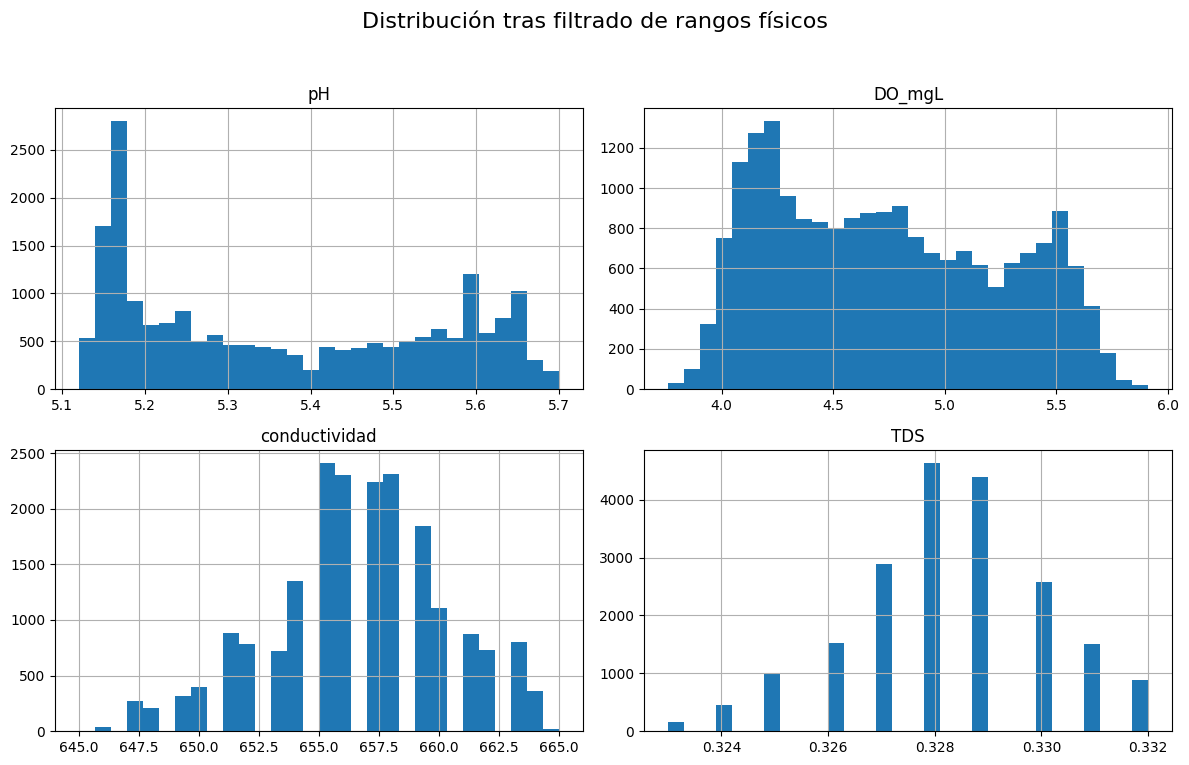


=== 5) Detección de outliers (IQR) ===
Conteo de outliers eliminados por variable: {'temperatura': np.int64(0), 'pH': np.int64(0), 'conductividad': np.int64(516), 'TDS': np.int64(0), 'DO_mgL': np.int64(0)}


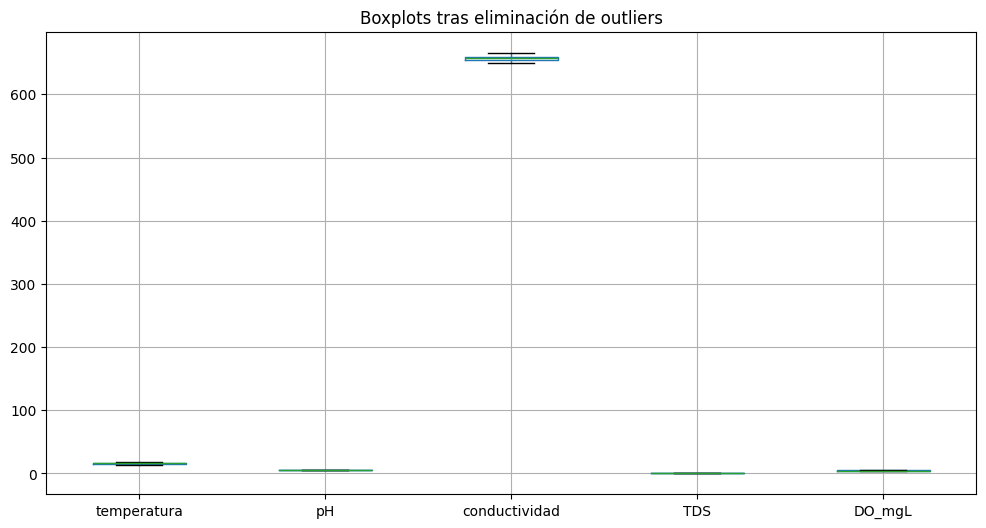


=== 6) Valores faltantes por columna antes de resample/interpolación ===
timestamp        0
temperatura      0
pH               0
conductividad    0
TDS              0
Sal.[psu]        0
Press.[psi]      0
DO_mgL           0
dtype: int64

Valores faltantes tras resample/interpolación:
temperatura      0
pH               0
conductividad    0
TDS              0
Sal.[psu]        0
Press.[psi]      0
DO_mgL           0
dtype: int64


d:\Proyecto_Peces\scripts\load_sensors.py:171: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df.resample(resample_interval).mean()


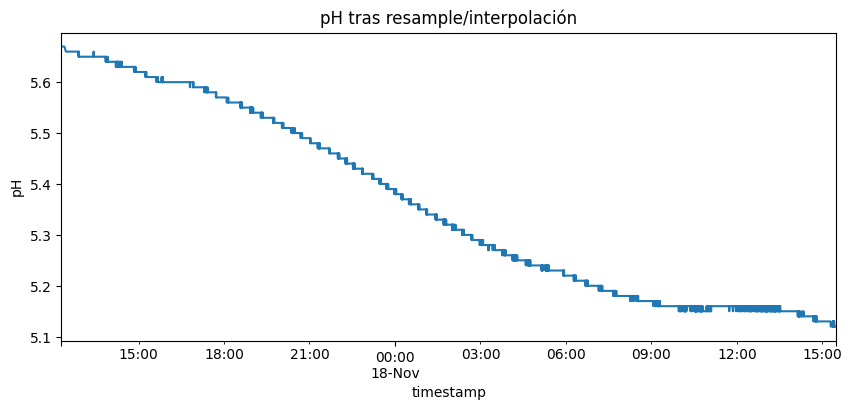


=== 7) Normalización Min-Max ===


,temperatura,pH,conductividad,TDS,DO_mgL
count,19584.000000,19584.000000,19584.000000,19584.000000,19584.000000
mean,0.519614,0.434407,0.482123,0.549926,0.452529
std,0.303553,0.331918,0.215515,0.219666,0.240410
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246187,0.090909,0.375000,0.375000,0.232558
50%,0.579521,0.363636,0.500000,0.500000,0.427907
75%,0.799564,0.763636,0.625000,0.750000,0.655814
max,1.000000,1.000000,1.000000,1.000000,1.000000


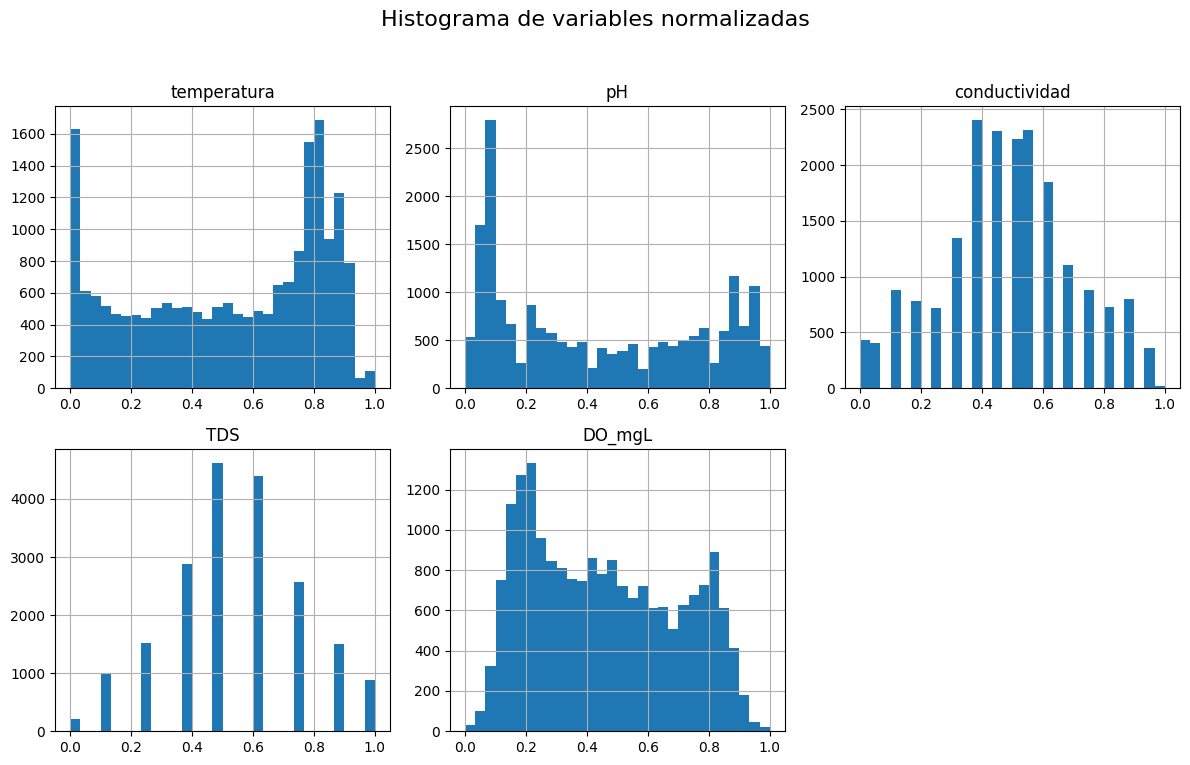


CSV limpio guardado en: ../data/sensores_preprocesado.csv


In [ ]:
# Definir rutas
excel_path = "../data/sensores.xlsx"
output_csv_path = "../data/sensores_preprocesado.csv"
hoja = "nov17"

# Ejecutar función
df_clean = clean_and_analyze_sensores(
    excel_path,
    sheet_name=hoja,
    output_csv_path=output_csv_path,
    resample_interval="5S"
)

## 2. Generar labels.csv emparejando imágenes con sensores

In [ ]:
# Definir rutas
img_dir = "../data/images"
sensores_csv = "../data/sensores_limpio.csv"
output_labels = "../data/labels.csv"

# Ejecutar función
df_labels = generar_labels_csv(img_dir, sensores_csv, output_labels)
df_labels.head()

,imagen,timestamp_imagen,timestamp_sens,temperatura,pH,conductividad,TDS,salinidad,presion,oxigeno_mgL,etiqueta
0,2021-11-17_12-46-57_0s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,16.87,5.66,650,0.325,0.32,10.813,4.46,
1,2021-11-17_12-46-57_10s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,16.87,5.66,650,0.325,0.32,10.813,4.46,
2,2021-11-17_12-46-57_15s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,16.87,5.66,650,0.325,0.32,10.813,4.46,
3,2021-11-17_12-46-57_20s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,16.87,5.66,650,0.325,0.32,10.813,4.46,
4,2021-11-17_12-46-57_25s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,16.87,5.66,650,0.325,0.32,10.813,4.46,


In [ ]:
# Definir rutas
img_dir = "../data/images"
sensores_csv = "../data/sensores_preprocesado.csv"
output_labels = "../data/labels2.csv"

# Ejecutar función
df_labels = generar_labels_csv_normalizado(
    img_dir, 
    sensores_csv, 
    output_labels,
    max_diff_seconds=30
)


Labels guardados en: ../data/labels2.csv


,imagen,timestamp_imagen,timestamp_sens,temperatura,pH,conductividad,TDS,DO_mgL,etiqueta
0,2021-11-17_12-46-57_0s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,0.718954,0.981818,0.0625,0.125,0.325581,estres_leve
1,2021-11-17_12-46-57_5s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,0.718954,0.981818,0.0625,0.125,0.325581,estres_leve
2,2021-11-17_12-46-57_55s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,0.718954,0.981818,0.0625,0.125,0.325581,estres_leve
3,2021-11-17_12-46-57_50s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,0.718954,0.981818,0.0625,0.125,0.325581,estres_leve
4,2021-11-17_12-46-57_40s.jpg,2021-11-17 12:46:57,2021-11-17 12:46:55,0.718954,0.981818,0.0625,0.125,0.325581,estres_leve


### Análisis del Dataset generado

Distribución de etiquetas:
etiqueta
estres_leve    11958
enfermo         2227
sin_dato          12
Name: count, dtype: int64

Porcentaje de cada clase:
etiqueta
estres_leve    84.229062
enfermo        15.686413
sin_dato        0.084525
Name: proportion, dtype: float64

Estadísticas de DO_mgL y pH por etiqueta:
              DO_mgL                                                    \
               count      mean       std       min       25%       50%   
etiqueta                                                                 
enfermo       2227.0  0.211815  0.076479  0.051163  0.148837  0.200000   
estres_leve  11958.0  0.547844  0.243531  0.023256  0.320930  0.595349   
sin_dato         0.0       NaN       NaN       NaN       NaN       NaN   

                                      pH                                \
                  75%       max    count      mean       std       min   
etiqueta                                                                 
enfermo      0.265116

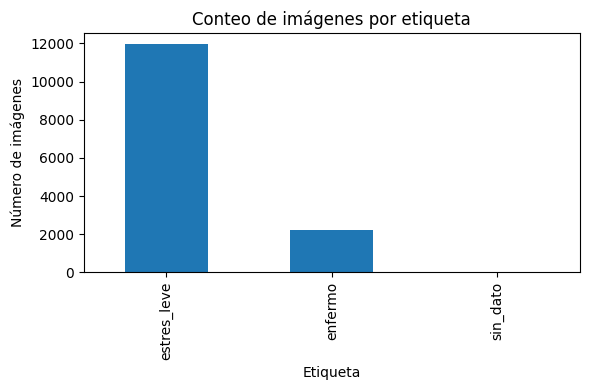

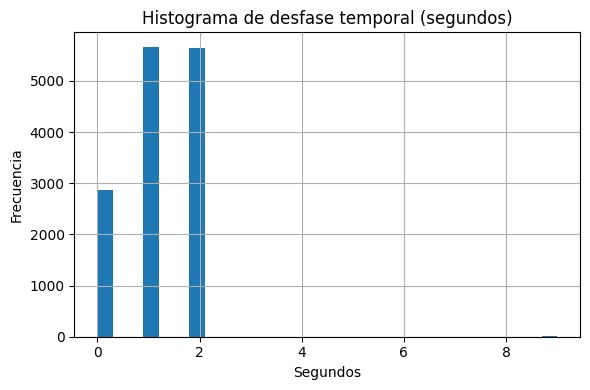

In [ ]:
# 1) Cargar el dataset
df = pd.read_csv(output_labels, parse_dates=["timestamp_imagen", "timestamp_sens"])

# 2) Conteo de etiquetas
print("Distribución de etiquetas:")
print(df["etiqueta"].value_counts(dropna=False))
print("\nPorcentaje de cada clase:")
print(df["etiqueta"].value_counts(normalize=True) * 100)

# 3) Estadísticas de los indicadores por etiqueta
print("\nEstadísticas de DO_mgL y pH por etiqueta:")
print(df.groupby("etiqueta")[["DO_mgL", "pH"]].describe())

# 4) Verificar desfase temporal
df["diff_seconds"] = (df["timestamp_imagen"] - df["timestamp_sens"]).abs().dt.total_seconds()
print("\nDesfase temporal entre imagen y sensor:")
print(df["diff_seconds"].describe())

# 5) Gráfica de distribución de etiquetas
plt.figure(figsize=(6,4))
df["etiqueta"].value_counts().plot(kind="bar")
plt.title("Conteo de imágenes por etiqueta")
plt.xlabel("Etiqueta")
plt.ylabel("Número de imágenes")
plt.tight_layout()
plt.show()

# 6) Histograma de desfase temporal
plt.figure(figsize=(6,4))
df["diff_seconds"].hist(bins=30)
plt.title("Histograma de desfase temporal (segundos)")
plt.xlabel("Segundos")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

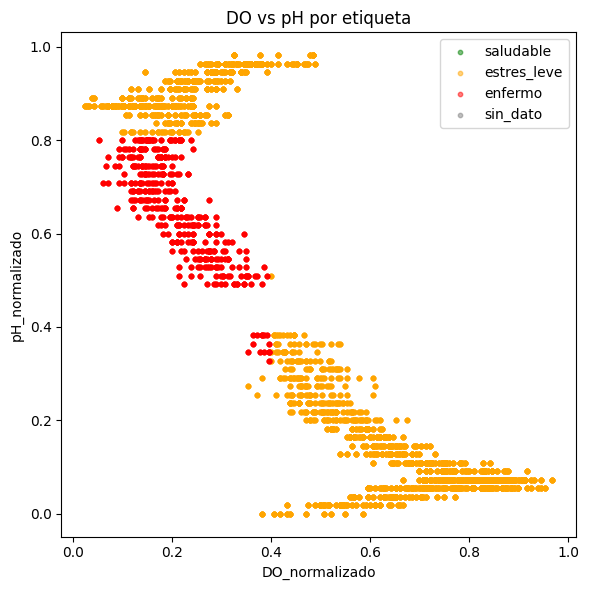

<Figure size 600x400 with 0 Axes>

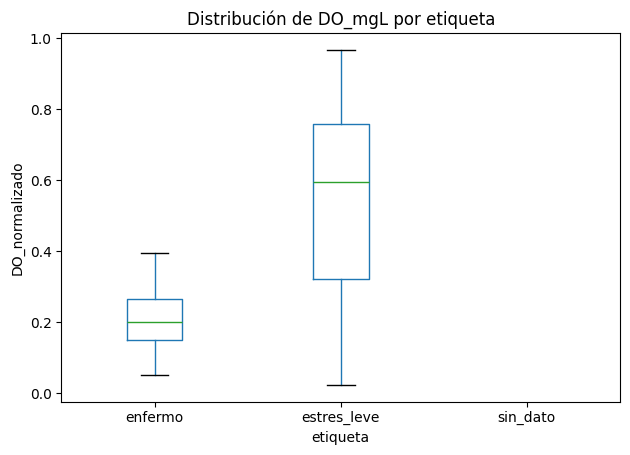

In [ ]:
# 1) Carga
df = pd.read_csv(output_labels, parse_dates=["timestamp_imagen","timestamp_sens"])

# 2) Scatter DO vs pH, coloreado por etiqueta
plt.figure(figsize=(6,6))
for etiqueta, color in [("saludable","green"),("estres_leve","orange"),("enfermo","red"),("sin_dato","gray")]:
    sub = df[df["etiqueta"]==etiqueta]
    plt.scatter(sub["DO_mgL"], sub["pH"], label=etiqueta, alpha=0.5, s=10, color=color)
plt.xlabel("DO_normalizado")
plt.ylabel("pH_normalizado")
plt.title("DO vs pH por etiqueta")
plt.legend()
plt.tight_layout()
plt.show()

# 3) Boxplot de DO por etiqueta
plt.figure(figsize=(6,4))
df.boxplot(column="DO_mgL", by="etiqueta", grid=False)
plt.suptitle("")  # quita el título automático
plt.title("Distribución de DO_mgL por etiqueta")
plt.ylabel("DO_normalizado")
plt.tight_layout()
plt.show()


### Etiquetado con umbrales dinámicos

DO 33%=0.302, 66%=0.656
pH 33%=0.091, 66%=0.655

Nueva distribución de etiquetas:
et_dyn
estres_leve    14197
Name: count, dtype: int64

Porcentaje:
et_dyn
estres_leve    100.0
Name: proportion, dtype: float64


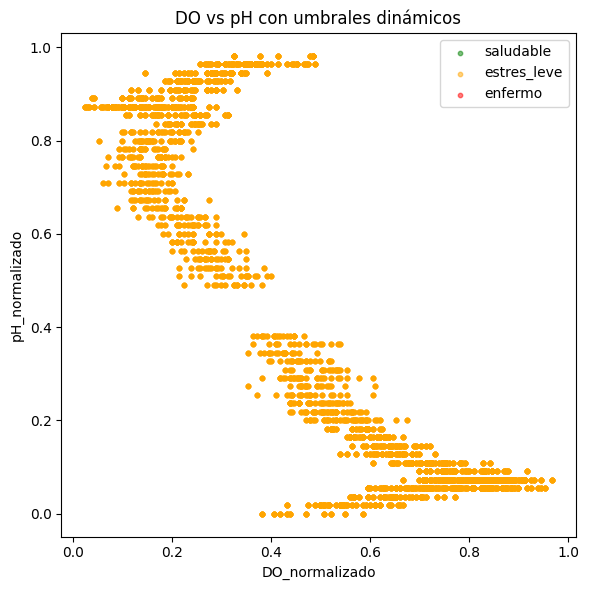

In [ ]:
# 1) Cargar labels actuales
df = pd.read_csv(output_labels, parse_dates=["timestamp_imagen","timestamp_sens"])

# 2) Calcular cuantiles para DO y pH
q_do = df["DO_mgL"].quantile([0.33, 0.66]).values  # [q33, q66]
q_ph = df["pH"].quantile([0.33, 0.66]).values      # [q33, q66]
low_do, high_do = q_do
low_ph, high_ph = q_ph

print(f"DO 33%={low_do:.3f}, 66%={high_do:.3f}")
print(f"pH 33%={low_ph:.3f}, 66%={high_ph:.3f}")

# 3) Re-etiquetar con umbrales dinámicos
def clasificar_dyn(row):
    do, ph = row["DO_mgL"], row["pH"]
    if do >= high_do and ph >= high_ph:
        return "saludable"
    elif do <= low_do and ph <= low_ph:
        return "enfermo"
    else:
        return "estres_leve"

df["et_dyn"] = df.apply(clasificar_dyn, axis=1)

# 4) Verificar nueva distribución
print("\nNueva distribución de etiquetas:")
print(df["et_dyn"].value_counts())
print("\nPorcentaje:")
print(df["et_dyn"].value_counts(normalize=True)*100)

# 5) Graficar DO vs pH con las nuevas etiquetas
plt.figure(figsize=(6,6))
colors = {"saludable":"green","estres_leve":"orange","enfermo":"red"}
for et, c in colors.items():
    sub = df[df["et_dyn"]==et]
    plt.scatter(sub["DO_mgL"], sub["pH"], c=c, label=et, alpha=0.5, s=10)
plt.xlabel("DO_normalizado")
plt.ylabel("pH_normalizado")
plt.title("DO vs pH con umbrales dinámicos")
plt.legend()
plt.tight_layout()
plt.show()


### Etiquetado con K-means

In [ ]:
# Etiquetado con K-means

X = df[["DO_mgL","pH"]].dropna().values
km = KMeans(n_clusters=3, random_state=0).fit(X)
df.loc[df[["DO_mgL","pH"]].dropna().index, "et_kmeans"] = km.labels_.astype(int)

# Mapear clusters a etiquetas según centroides (p.ej. el cluster con DO más alto → 'saludable')
centroids = km.cluster_centers_
order = centroids[:,0].argsort()  # orden por valor de DO
mapping = { order[0]:"enfermo", order[1]:"estres_leve", order[2]:"saludable" }
df["et_kmeans"] = df["et_kmeans"].map(mapping)

# Ver distribución
print(df["et_kmeans"].value_counts())


et_kmeans
enfermo        5769
saludable      5256
estres_leve    3160
Name: count, dtype: int64


### Evaluación de la calidad de los clusters generados en K-means

In [ ]:
# Calidad del clustering: Silhouette Score

# 1) Prepara X con tus dos variables
X = df[['DO_mgL','pH']].dropna().values

# 2) Clustering
km = KMeans(n_clusters=3, random_state=0).fit(X)
labels = km.labels_

# 3) Silhouette
score = silhouette_score(X, labels)
print(f"Silhouette Score (3 clusters): {score:.3f}")


Silhouette Score (3 clusters): 0.608


### Visualización del Centroide

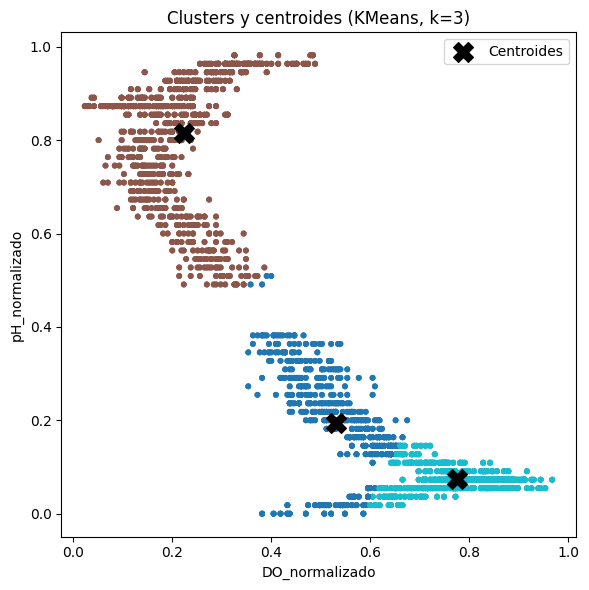

In [ ]:
# Visualizar centroides

centers = km.cluster_centers_

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=10, alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], c='black', marker='X', s=200, label='Centroides')
plt.xlabel("DO_normalizado")
plt.ylabel("pH_normalizado")
plt.title("Clusters y centroides (KMeans, k=3)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Silhouette en espacio PCA

features = ['DO_mgL','pH','conductividad','TDS']
X4 = df[features].dropna().values

pca = PCA(n_components=2).fit_transform(X4)
km4 = KMeans(n_clusters=3, random_state=0).fit(pca)
score4 = silhouette_score(pca, km4.labels_)
print("Silhouette en espacio PCA(4→2):", score4)


Silhouette en espacio PCA(4→2): 0.5540895478096616
